In [1]:
import pandas as pd
import talib as tl

%load_ext zipline
%matplotlib inline

C:\Installations\Anaconda3\envs\zippy\lib\site-packages\empyrical\stats.py:704: RuntimeWarning: invalid value encountered in true_divide
  out=out,
C:\Installations\Anaconda3\envs\zippy\lib\site-packages\empyrical\stats.py:790: RuntimeWarning: invalid value encountered in true_divide
  np.divide(average_annual_return, annualized_downside_risk, out=out)


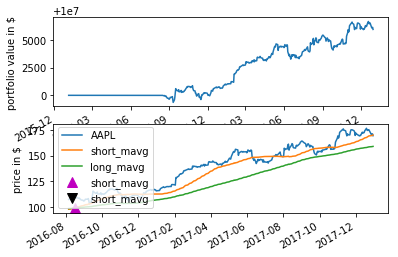

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.013984,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2016-01-05 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.012312,0.175997,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2016-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.024771,0.137855,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2016-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.048168,0.167867,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2016-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.058601,0.145653,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2016-01-11 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.057684,0.154953,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2016-01-12 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.050077,0.177554,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2016-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.073773,0.192030,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2016-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.058567,0.225894,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2016-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.078776,0.225683,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0


In [2]:
%%zipline --start 2016-1-1 --end 2018-1-1


from zipline.api import order_target, record, symbol
import matplotlib.pyplot as plt

def initialize(context):
    context.i = 0
    context.asset = symbol('AAPL')


def handle_data(context, data):
    # Skip first 30 days to get full windows
    context.i += 1
    if context.i < 150:
        return

    # Compute averages
    sma = data.history(context.asset, 'price', bar_count=50, frequency="1d").mean()
    lma = data.history(context.asset, 'price', bar_count=150, frequency="1d").mean()

    # Trading logic
    if sma > lma:
        order_target(context.asset, 100)
    elif sma < lma:
        order_target(context.asset, 0)

    # Save values for later inspection
    record(
        AAPL=data.current(context.asset, 'price'),
        short_mavg=sma,
        long_mavg=lma
    )


def analyze(context, perf):
    fig = plt.figure()
    ax1 = fig.add_subplot(211)
    perf.portfolio_value.plot(ax=ax1)
    ax1.set_ylabel('portfolio value in $')

    ax2 = fig.add_subplot(212)
    perf['AAPL'].plot(ax=ax2)
    perf[['short_mavg', 'long_mavg']].plot(ax=ax2)

    perf_trans = perf.ix[[t != [] for t in perf.transactions]]
    buys = perf_trans.ix[[t[0]['amount'] > 0 for t in perf_trans.transactions]]
    sells = perf_trans.ix[
        [t[0]['amount'] < 0 for t in perf_trans.transactions]]
    ax2.plot(buys.index, perf.short_mavg.ix[buys.index],
             '^', markersize=10, color='m')
    ax2.plot(sells.index, perf.short_mavg.ix[sells.index],
             'v', markersize=10, color='k')
    ax2.set_ylabel('price in $')
    plt.legend(loc=0)
    plt.show()

In [3]:
summary = _
summary

,AAPL,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2016-01-04 21:00:00+00:00,NaN,NaN,0.000000,NaN,-0.013984,NaN,NaN,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,1,[],0.0
2016-01-05 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.012312,0.175997,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,2,[],0.0
2016-01-06 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.024771,0.137855,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,3,[],0.0
2016-01-07 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.048168,0.167867,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,4,[],0.0
2016-01-08 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.058601,0.145653,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,5,[],0.0
2016-01-11 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.057684,0.154953,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,6,[],0.0
2016-01-12 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.050077,0.177554,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,7,[],0.0
2016-01-13 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.073773,0.192030,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,8,[],0.0
2016-01-14 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.058567,0.225894,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,9,[],0.0
2016-01-15 21:00:00+00:00,NaN,0.000000,0.000000,0.000000,-0.078776,0.225683,0.000000,0.0,1.000000e+07,0.0,...,NaN,0.0,0,NaN,1.000000e+07,0.0,0.0,10,[],0.0
